<a href="https://colab.research.google.com/github/Amalaa-George/oibsip_taskno.1/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here the task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv('/content/iris data set.zip')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#count the occurance of each species
species_counts = data['Species'].value_counts()
species_counts

Species
0    50
1    50
2    50
Name: count, dtype: int64

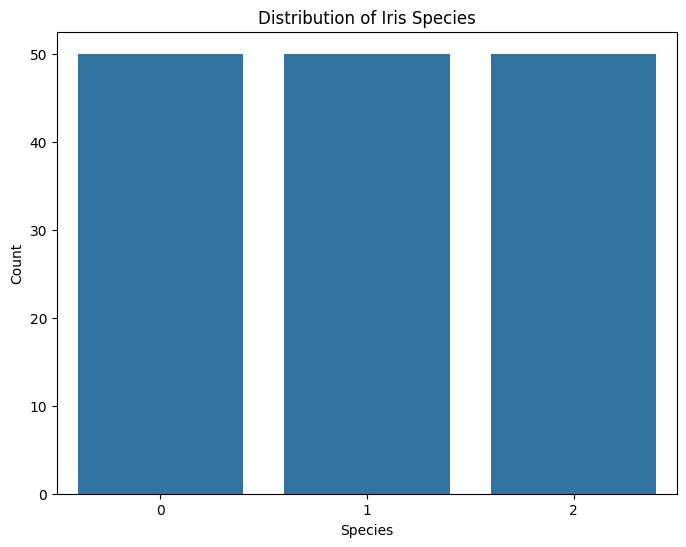

In [ ]:
#plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
data.drop('Id', axis=1, inplace=True)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Species']= label_encoder.fit_transform(data['Species'])

data['Species'].unique()

array([0, 1, 2])

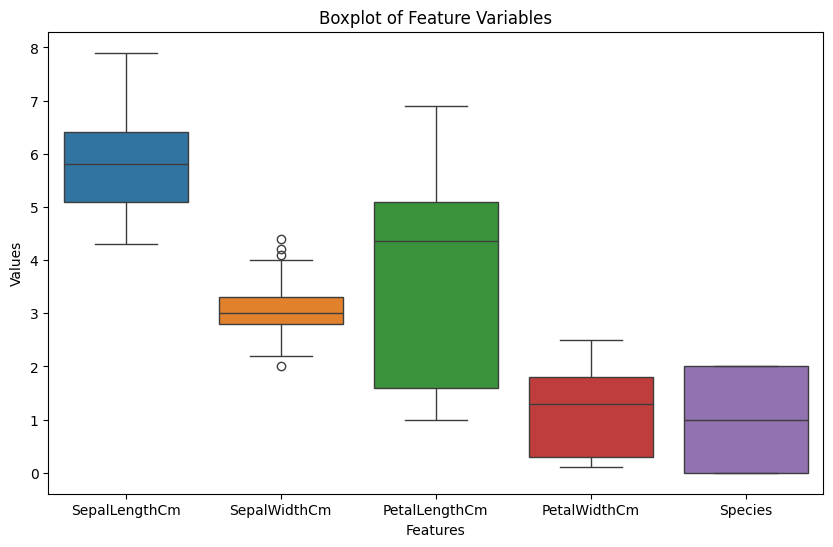

In [ ]:
# Plotting boxplots for each feature variable in X to check outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define a function to remove outliers based on z-score
df=data
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from X
data_no_outliers = remove_outliers_zscore(data)

# Print the shape before and after removing outliers
print("Shape of data before removing outliers:", data.shape)
print("Shape of data after removing outliers:", data_no_outliers.shape)

Shape of data before removing outliers: (150, 5)
Shape of data after removing outliers: (149, 5)


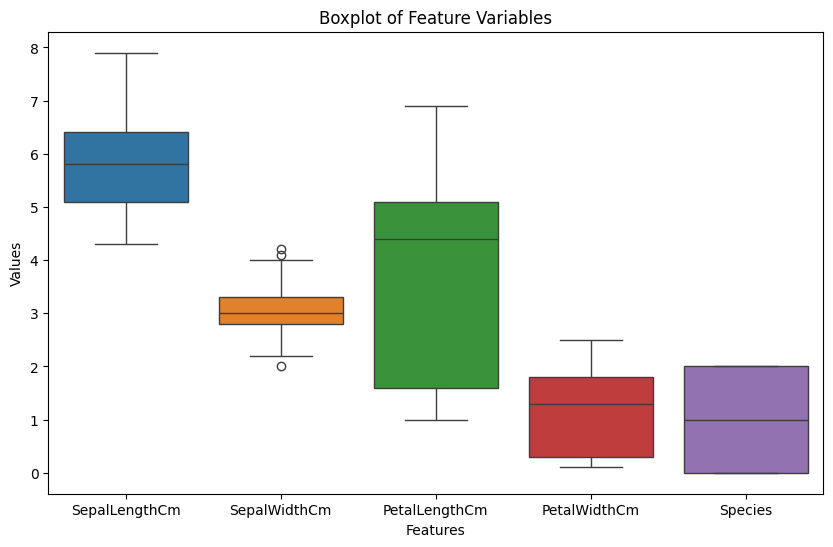

In [ ]:
# Plotting boxplots for each feature variable in X to check outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data_no_outliers)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into features and target
X = data_no_outliers.drop('Species', axis=1)
y = data_no_outliers['Species']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(111, 4)
(38, 4)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
print("Train Score : ", model.score(X_train,y_train))
print("Test Score : ", model.scorAmalaa-George/OIBSIPe(X_test,y_test))

Train Score :  1.0
Test Score :  0.868421052631579


In [ ]:
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
# Accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

Training Accuracy: 1.0
Testing Accuracy: 0.868421052631579


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification Report
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_preds))

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.76      0.93      0.84        14
           2       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.87      0.84      0.85        38
weighted avg       0.88      0.87      0.86        38



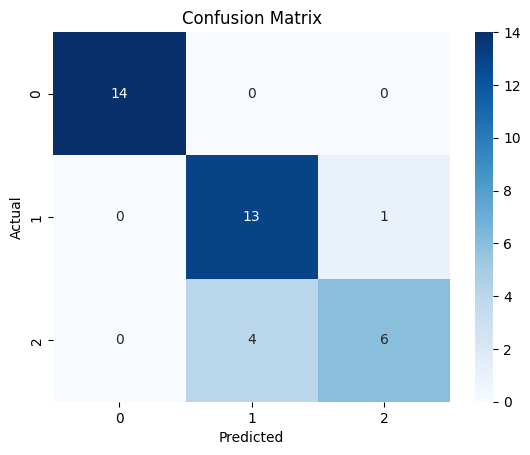

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Data Prediction and Checking.
# Collect user input
user_input = input("Enter values for sepal length, sepal width, petal length, and petal width separated by spaces: ")
# Preprocess user input
user_input = [float(x) for x in user_input.split()]
# Create a DataFrame for the user input
user_input_df = pd.DataFrame([user_input], columns=data.drop('Species', axis=1).columns)
# Use the trained model to predict the class label for the user input
predicted_class = model.predict(user_input_df)
# Map the predicted class label to the corresponding class name
predicted_class_name = label_encoder.inverse_transform(predicted_class)
# Print the predicted class name
print(f"The predicted class for the input is: {predicted_class_name[0]}")

Enter values for sepal length, sepal width, petal length, and petal width separated by spaces: 5 2.9 1 0.2
The predicted class for the input is: Iris-setosa
